<a href="https://colab.research.google.com/github/ahmadhajmosa/Machine-learning-labs/blob/probst/Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab on Machine Learning and Applications in Intelligent Vehicles
## Session 1: Introduction


#Session 2: 05.06 - 13:00 - 14:30 :




## Intro:

Tensorflow is a powerful framework for implementing and deploying large-scale deep learning models. Recently, it has been widely used in both reasearch and production. TF objective is to combine scale and flexibility.

In the past session, we will learning the following:

1. TF programming stack
2. TF programming concepts including computatoin graphs, operations and sessions. 
3. Implementation of linear regression
4. Implementation of feed-forward neural networks

## TF stack:

TensorFlow is a framework composed of two core building blocks — a library for defining computational graphs and a runtime for executing such graphs on a variety of different hardware


![alt text](https://www.tensorflow.org/images/layers.png)


Before goining into details about the stack, let us talk about computational graphs.

### Computational Graphs

A directed graph is a data structure consisting of nodes (vertices) and edges. It’s a set of vertices connected pairwise by directed edges.

Graphs come in many shapes and sizes and are used to solve many real-life problems, such as representing networks including telephone networks, circuit networks, road networks, and even social networks. 
![alt text](https://cdn-images-1.medium.com/max/800/1*V6aYjD3AxDbEKYahkGqVQw.png)

TensorFlow uses directed graphs internally to represent computations, and they call this data flow graphs (or computational graphs).

The nodes in TF data flow graph mostly represents operations, variables and placeholders.

Take for example the following operation:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)

To create a computational graph out of this program, we create nodes for each of the operations in our program, along with the input variables a and b. In fact, a and b could be constants if they don’t change. If one node is used as the input to another operation we draw a directed arrow that goes from one node to another.

The computational graph for this program might look like this:
![alt text](https://cdn-images-1.medium.com/max/800/1*vPb9E0Yd1QUAD0oFmAgaOw.png)

Operations create or manipulate data according to specific rules. In TensorFlow those rules are called Ops, short for operations. Variables on the other hand represent shared, persistent state that can be manipulated by running Ops on those variables.

The questions now what are the advantages of representing operations as directed graphs: The main advantage of using directed graphs is the ability to do **parallelism** and what is called **dependency driving scheduling**. 
For example, consider again the follwoing code:
![alt text](https://cdn-images-1.medium.com/max/800/1*6E3sfit6DCeJ9mOz17g4bA.png)
At the most fundamental level, most computer programs are mainly composed of two things — primitive operations and an order in which these operations are executed, often sequentially, line by line. This means we would first multiply a and b and only when this expression was evaluated we would take their sum. Computational graphs on the otherhand, exclusively specify the dependencies across the operations.
If we look at our computational graph we see that we could execute the multiplication and addition in parallel. That’s because these two operations do not depend on each other.
 So we can use the topology of the graph to drive the scheduling of operations and execute them in the most efficient manner, e.g. using multiple GPUs on a single machine or even distribute the execution across multiple machines.
 Another key advantage is portability. The graph is a language-independent representation of our code. So we can build the graph in Python, save the model (TensorFlow uses protocol buffers), and restore the model in a different language, say C++, if you want to go really fast.
 
 

--------------------------------
# References:

https://medium.com/@d3lm/understand-tensorflow-by-mimicking-its-api-from-scratch-faa55787170d

https://www.tensorflow.org/guide/extend/architecture

https://www.tensorflow.org/guide/low_level_intro

  
 






# placeholder: tensors are feeded externaly for example inputs tensors + output tensors

# variables : tensors represent the parameters of the network/graph ie. nn weights

In [12]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_outputs = 4
num_samples= 10
# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)


# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_outputs ]))

# model
y_p = tf.matmul(x, w_1)


# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



iter:  0 cost:  1.123856
iter:  1 cost:  1.1211833
iter:  2 cost:  1.1185161
iter:  3 cost:  1.1158546
iter:  4 cost:  1.1131986
iter:  5 cost:  1.1105487
iter:  6 cost:  1.1079047
iter:  7 cost:  1.1052667
iter:  8 cost:  1.1026348
iter:  9 cost:  1.1000088
predicted  [[ 0.9050338   0.1602141   0.92013043  0.35228956]
 [ 1.0046937  -0.46938652  0.9352531  -0.28297973]
 [-0.03045141  0.7378717   0.94228226  0.84887326]
 [ 1.6736385  -0.07725339  1.8665017   0.28374815]
 [ 1.9989486  -1.0733619   1.1903814  -0.7728812 ]
 [ 0.5502916   0.84981495  1.4021975   1.0713874 ]
 [ 2.1071057  -1.4316987   0.89470595 -1.1591331 ]
 [ 2.2422628   0.18256232  1.5306542   0.5781349 ]
 [ 0.5619546  -0.7266482   0.43879023 -0.6438483 ]
 [ 1.8578552  -0.09937002  2.063054    0.30010092]]
real  [[0.21474705 0.47051972 0.67244097 0.54962198]
 [0.79322732 0.24853241 0.53264926 0.04893323]
 [0.98697024 0.00239486 0.35794472 0.84164742]
 [0.58980382 0.80074009 0.36212481 0.53885776]
 [0.5726852  0.80401436 0

In [13]:
sess = tf.Session() 
sess.run(init)
    
for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
print('predicted ', y_p_p)
print('real ', y_gr)

#sess.close()

iter:  0 cost:  0.98726064
iter:  1 cost:  0.9855059
iter:  2 cost:  0.98375356
iter:  3 cost:  0.9820038
iter:  4 cost:  0.9802567
iter:  5 cost:  0.97851217
iter:  6 cost:  0.9767703
iter:  7 cost:  0.9750311
iter:  8 cost:  0.97329473
iter:  9 cost:  0.9715611
predicted  [[ 0.26064053 -0.25670126 -0.5003677  -0.5513109 ]
 [ 0.2602894   0.6473293  -0.44281128  0.48309955]
 [-0.37220675 -0.5429424  -0.1174845  -1.1071638 ]
 [ 0.36778173  0.19079013 -0.86150897 -0.35512745]
 [ 0.8074629   1.1018417  -0.8530548   1.0988331 ]
 [-0.1447592  -0.79902995 -0.43940505 -1.4962587 ]
 [ 0.9829569   1.4039248  -0.84513634  1.6180394 ]
 [ 0.963123   -0.7549219  -1.1982899  -1.1118507 ]
 [ 0.13497426  1.0172094  -0.16676992  1.0520728 ]
 [ 0.41086552  0.22719614 -0.9539254  -0.37225053]]
real  [[0.21474705 0.47051972 0.67244097 0.54962198]
 [0.79322732 0.24853241 0.53264926 0.04893323]
 [0.98697024 0.00239486 0.35794472 0.84164742]
 [0.58980382 0.80074009 0.36212481 0.53885776]
 [0.5726852  0.80401

In [14]:
import tensorflow as tf
import numpy as np

# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 3
num_h1_n = 4
num_h2_n = 10
num_outputs = 4

num_samples= 10

# Training data
x_gr = np.random.rand(num_samples,num_inputs)
y_gr = np.random.rand(num_samples,num_outputs)


# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))




# model

h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer



# cost

cost = tf.reduce_mean(tf.pow(y-y_p,2)) # 

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(10):
    
        sess.run(optimizer, feed_dict={x: x_gr, y: y_gr}) 

        pr_cost = sess.run(cost, feed_dict={x: x_gr,y: y_gr})
    
        print('iter: ',i, 'cost: ', pr_cost)
    
    y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



iter:  0 cost:  9.055705
iter:  1 cost:  9.014727
iter:  2 cost:  8.9738865
iter:  3 cost:  8.93319
iter:  4 cost:  8.892634
iter:  5 cost:  8.852217
iter:  6 cost:  8.811934
iter:  7 cost:  8.771787
iter:  8 cost:  8.731775
iter:  9 cost:  8.691897
predicted  [[-1.2477537   5.9756837   0.6207233   1.423921  ]
 [-1.4750469   5.6989446   0.5577158   1.2042632 ]
 [-1.4107713   5.7938414   0.5821939   1.2413826 ]
 [-1.4418812   5.7458324   0.56632453  1.2346345 ]
 [-1.2363346   5.9920564   0.65204597  1.4277827 ]
 [-1.227309    5.9981165   0.6149899   1.4424824 ]
 [-1.0931115   6.1276073   0.6602364   1.6102186 ]
 [-1.4714556   5.741755    0.5315476   1.1362072 ]
 [-1.2333767   6.011944    0.6158439   1.3924607 ]
 [-1.3408425   5.8636127   0.61586833  1.347872  ]]
real  [[0.32463124 0.73313092 0.47488059 0.30511154]
 [0.7638626  0.63017407 0.09125469 0.53216256]
 [0.26815479 0.06324862 0.71566913 0.62970509]
 [0.8064397  0.15393563 0.48375146 0.74241536]
 [0.80525852 0.38296255 0.97285628

In [15]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [16]:
# training data
X_train = mnist.train.images
Y_train = mnist.train.labels

# training data
X_test = mnist.test.images
Y_test = mnist.test.labels

# training data
X_val = mnist.validation.images
Y_val = mnist.validation.labels


# Parameters
learning_rate = 0.001
training_iters = 2000
batch_size = 128

# Network Parameters

num_inputs = 784
num_h1_n = 100
num_h2_n = 100
num_outputs = 10



# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs])
y = tf.placeholder(tf.float32, [None, num_outputs])


# weights 
w_1 = tf.Variable(tf.random_normal([num_inputs,num_h1_n ]))
w_2 = tf.Variable(tf.random_normal([num_h1_n,num_h2_n ]))
w_3 = tf.Variable(tf.random_normal([num_h2_n,num_outputs ]))

# bias 
b_1 = tf.Variable(tf.random_normal([num_h1_n]))
b_2 = tf.Variable(tf.random_normal([num_h2_n]))
b_3 = tf.Variable(tf.random_normal([num_outputs]))




# model

h1 = tf.nn.sigmoid(tf.add(tf.matmul(x, w_1),b_1)) # model of hidden layer 1
h2 = tf.nn.sigmoid(tf.add(tf.matmul(h1, w_2),b_2)) # model of hidden layer 2
y_p = tf.add(tf.matmul(h2, w_3),b_3) # model of the output layer



# cost

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost


# Evaluate model
correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))

## 3 images, y_p=[[0.1,0.0,0,0.9],[0.9,0.1,0,0.],[0,0.9,0,0.1]] 

# tf.argmax(y_p, 1) [3,0,1] 

# 3 images, y=[[0,0.0,0,1],[0,1,0,0],[0,1,0,0]] 

# tf.argmax(y, 1) [3,1,1]

# tf.equal [True,False,True]--[1,0,1]--- 2/3 

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#

# optimisation 

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights

init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
    

        train_cost, train_acc  = sess.run([cost,accuracy], feed_dict={x: batch_x,y: batch_y})
    
        
        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        test_cost, test_acc  = sess.run([cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc )

    
    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)




    

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

iter:  0 train_cost:  11.325241 train_acc:  0.0625 test_cost:  11.599855 test_acc:  0.0390625
iter:  1 train_cost:  11.090834 train_acc:  0.09375 test_cost:  10.510571 test_acc:  0.078125
iter:  2 train_cost:  10.87133 train_acc:  0.078125 test_cost:  10.276623 test_acc:  0.078125
iter:  3 train_cost:  10.766141 train_acc:  0.0390625 test_cost:  9.33554 test_acc:  0.078125
iter:  4 train_cost:  9.203386 train_acc:  0.03125 test_cost:  10.173584 test_acc:  0.0859375
iter:  5 train_cost:  9.306101 train_acc:  0.078125 test_cost:  9.957951 test_acc:  0.078125
iter:  6 train_cost:  9.559373 train_acc:  0.0625 test_cost:  9.849054 test_acc:  0.0625
iter:  7 train_cost:  9.270992 train_acc:  0.0859375 test_cost:  9.251337 test_acc:  0.0703125
iter:  8 train_cost:  9.532303 train_acc:  0.078125 test_cost:

In [0]:
import tensorflow as tf 


def variable_summaries(var):
  """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
  with tf.name_scope('summaries'):
    mean = tf.reduce_mean(var)
    tf.summary.scalar('mean', mean)
    with tf.name_scope('stddev'):
      stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
    tf.summary.scalar('stddev', stddev)
    tf.summary.scalar('max', tf.reduce_max(var))
    tf.summary.scalar('min', tf.reduce_min(var))
    tf.summary.histogram('histogram', var)




Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

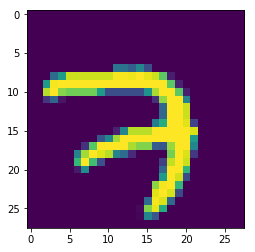

In [18]:
%matplotlib inline

from matplotlib.pyplot import imshow

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

mnist.train.images.shape

image =mnist.train.images[0].reshape((28,28))
#MNIST data input (img shape: 28*28)
imshow(image)

mnist.train.labels[0]

# CNN using Tensorflow




In [19]:
n_classes=10
learning_rate=0.002
batch_size=64

import tensorflow as tf
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


num_inputs = 784
num_outputs= 10

# tf Graph input
x = tf.placeholder(tf.float32, [None, num_inputs],name = 'input')
y = tf.placeholder(tf.float32, [None, num_outputs],name =  'output')


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')


# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    
    with tf.name_scope('input-reshape'):
        x = tf.reshape(x, shape=[-1, 28, 28, 1])

    with tf.name_scope('conv-1'):

        # Convolution Layer
        conv1 = conv2d(x, weights['wc1'], biases['bc1'])
        print('con1_before max',conv1.get_shape().as_list())

    with tf.name_scope('maxpooling-1'):
        
        # Max Pooling (down-sampling)
        conv1 = maxpool2d(conv1, k=2)
        print('con1_after max',conv1.get_shape().as_list())


    # Convolution Layer
    with tf.name_scope('conv-2'):

        conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
        print('con2_before max',conv2.get_shape().as_list())


    with tf.name_scope('maxpooling-2'):
        
     
        # Max Pooling (down-sampling)
        conv2 = maxpool2d(conv2, k=2)
        print('con2_after max', conv2.get_shape().as_list())

    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    #wd1 numx3x3  wd1.get_shape() -> numx9 
    with tf.name_scope('flatten'):
    
        fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
        fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
        fc1 = tf.nn.relu(fc1)
    # Apply Dropout
    #fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    with tf.name_scope('output'):
    
        out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out


# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]), name="wc1"),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

y_p = conv_net(x, weights, biases)

#crossentropy cost
with tf.name_scope('cross_entropy'):

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_p, labels=y)) # cross entropy cost

#tf.summary.scalar('cross_entropy', cost)


# Evaluate model
with tf.name_scope('operations'):

    correct_pred = tf.equal(tf.argmax(y_p, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#
merged = tf.summary.scalar('accuracy', accuracy)



# optimisation 
with tf.name_scope('optimisation'):

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# initalizing the graph and the weights
#merged = tf.summary.merge_all()

init = tf.global_variables_initializer()



# Launch the graph
with tf.Session() as sess:
    #graph_writer = tf.summary.FileWriter('./log/train', sess.graph)
    #graph_writer.add_summary()
    train_writer = tf.summary.FileWriter('./log/train', sess.graph)
    test_writer = tf.summary.FileWriter('./log/test')
    sess.run(init)
    print('started')
    
    for i in range(10000):
        
        
        
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        

        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})


        summary,train_cost , train_acc = sess.run([merged,cost,accuracy], feed_dict={x: batch_x,y: batch_y})
        train_writer.add_summary(summary, i)

        #print('started')

        test_batch_x, test_batch_y = mnist.test.next_batch(batch_size)

        summary,test_cost, test_acc  = sess.run([merged,cost,accuracy], feed_dict={x: test_batch_x,y: test_batch_y})
        train_writer.add_summary(summary, i)
        if i % 100 ==0:

            print('iter: ',i, 'train_cost: ', train_cost, 'train_acc: ', train_acc,'test_cost: ', test_cost, 'test_acc: ', test_acc )


    #y_p_p = sess.run(y_p, feed_dict={x: x_gr, y: y_gr})
    
    print('predicted ', y_p_p)
    print('real ', y_gr)



con1_before max [None, 28, 28, 32]
con1_after max [None, 14, 14, 32]
con2_before max [None, 14, 14, 64]
con2_after max [None, 7, 7, 64]
started
iter:  0 train_cost:  42032.383 train_acc:  0.09375 test_cost:  49154.242 test_acc:  0.109375
iter:  100 train_cost:  2872.5776 train_acc:  0.8125 test_cost:  1861.5217 test_acc:  0.828125
iter:  200 train_cost:  1496.2236 train_acc:  0.859375 test_cost:  1191.8324 test_acc:  0.9375
iter:  300 train_cost:  1286.6677 train_acc:  0.9375 test_cost:  432.9254 test_acc:  0.9375
iter:  400 train_cost:  303.96716 train_acc:  0.9375 test_cost:  1015.906 test_acc:  0.953125
iter:  500 train_cost:  560.5688 train_acc:  0.953125 test_cost:  482.98932 test_acc:  0.9375
iter:  600 train_cost:  4.3995743 train_acc:  0.984375 test_cost:  207.38779 test_acc:  0.96875
iter:  700 train_cost:  1497.8547 train_acc:  0.953125 test_cost:  879.27905 test_acc:  0.90625
iter:  800 train_cost:  206.42395 train_acc:  0.984375 test_cost:  231.63116 test_acc:  0.9375
iter:

In [20]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-06-06 07:31:04--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.195.209.198, 52.4.95.48, 34.206.253.53, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.195.209.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16648024 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  15.88M  7.15MB/s    in 2.2s    

2019-06-06 07:31:07 (7.15 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [16648024/16648024]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
!rm -rf log

In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [24]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://6fb4add5.ngrok.io
